# EKSİK VERİ ANALİZİ (MISING DATA ANALYSIS)

## HIZLI ÇÖZÜM 

In [4]:
import pandas as pd
import numpy as np
V1 = np.array([40, 50 ,10 ,4, np.NaN, 7, 9, 50, np.NaN])
V2 = np.array([450, 77 ,100 ,4, np.NaN, 7, np.NaN, 50, 44])
V3 = np.array([15 , np.NaN ,162 , 462, 532, 751, 9213, 670, 588])

df = pd.DataFrame({"V1" : V1 , "V2" : V2, "V3" : V3})
df

,V1,V2,V3
0,40.0,450.0,15.0
1,50.0,77.0,NaN
2,10.0,100.0,162.0
3,4.0,4.0,462.0
4,NaN,NaN,532.0
5,7.0,7.0,751.0
6,9.0,NaN,9213.0
7,50.0,50.0,670.0
8,NaN,44.0,588.0


In [5]:
df.isnull().sum()   #satırlardaki eksil biilgi sayıları

V1    2
V2    2
V3    1
dtype: int64

In [8]:
df.notnull()  # dataframedeki eksik bilgi olup olmadığı sorgulandı sonucu True False arrayidir.

,V1,V2,V3
0,True,True,True
1,True,True,False
2,True,True,True
3,True,True,True
4,False,False,True
5,True,True,True
6,True,False,True
7,True,True,True
8,False,True,True


In [ ]:
# EKSİK BİLGİ BULUNAN SATILAR HARİÇ DATAFRAME GORUNTULEME

In [13]:
df[df.notnull().all(axis = 1)]  

,V1,V2,V3
0,40.0,450.0,15.0
2,10.0,100.0,162.0
3,4.0,4.0,462.0
5,7.0,7.0,751.0
7,50.0,50.0,670.0


In [14]:
# EKSİK BİLGİ BULUNAN SATIRLAR DATAFRAME GORUNTULEME

In [17]:
df [ df.isnull().any(axis = 1)]  #eksik bilgiler ekranda dataframe olarak gözükür.

,V1,V2,V3
1,50.0,77.0,NaN
4,NaN,NaN,532.0
6,9.0,NaN,9213.0
8,NaN,44.0,588.0


In [ ]:
#değişkende eksik değer olmayan veri sayırı
df.notnull().sum()

In [ ]:
#değişkende eksik değer sayısına erişmek
df.isnull().sum()

In [ ]:
# en az bir eksik değere sahip olan gözlemler
df[df.isnull().any(axis = 1)]

In [ ]:
# bütün veriler tam olan gözlemler
df[df.notnull().all(axis = 1)]

## EKSİK BİLGİLERİN SİLİNMESİ 

In [30]:
df.dropna()   #operatörü ile dataframedeki eksik bilgi bulunan satırlar silinebilir.

,V1,V2,V3
0,40.0,450.0,15.0
2,10.0,100.0,162.0
3,4.0,4.0,462.0
5,7.0,7.0,751.0
7,50.0,50.0,670.0


In [113]:
df["silinecek"] = np.nan
df

,V1,V2,V3,silinecek
0,40.0,450.0,15.0,NaN
1,50.0,77.0,NaN,NaN
2,10.0,100.0,162.0,NaN
3,4.0,4.0,462.0,NaN
4,NaN,NaN,532.0,NaN
5,7.0,7.0,751.0,NaN
6,9.0,NaN,9213.0,NaN
7,50.0,50.0,670.0,NaN
8,NaN,44.0,588.0,NaN


In [116]:
df.dropna(how = "all", axis = 1, inplace = True)  #sütun bazında tüm değerler null ise silinir.

# EKSİK BİLGİLERİN DOLDURULMASI

### TÜM DEĞİŞKENLER İÇİN BİRİNCİ YOL 

In [32]:
df

,V1,V2,V3
0,40.0,450.0,15.0
1,50.0,77.0,NaN
2,10.0,100.0,162.0
3,4.0,4.0,462.0
4,NaN,NaN,532.0
5,7.0,7.0,751.0
6,9.0,NaN,9213.0
7,50.0,50.0,670.0
8,NaN,44.0,588.0


In [33]:
# V1 DEĞİŞKENİN EKSİK BİLGİLERİNİ V1 DEĞİŞKENİNİN ORTALAMA İLE DOLDURULMASI

In [40]:
df["V2"].fillna(df["V2"].mean())  #inplace = True ile df kalıcı olarak sağlanabilir.  

0    450.000000
1     77.000000
2    100.000000
3      4.000000
4    104.571429
5      7.000000
6    104.571429
7     50.000000
8     44.000000
Name: V2, dtype: float64

**_v2 değişkeninin eksik değerlerine v2 değişkenin ortalaması atanmıştır. Şimdi diğer değişkenlerede aynı işlem yapılması istenir ise lambda fonksiyonu kullanılarak aynı zamanda apply bu işlem gerçekleştirilebilir._**

In [48]:
df.apply(lambda x: x.fillna( x.mean()), axis = 0)

,V1,V2,V3
0,40.000000,450.000000,15.000
1,50.000000,77.000000,1549.125
2,10.000000,100.000000,162.000
3,4.000000,4.000000,462.000
4,24.285714,104.571429,532.000
5,7.000000,7.000000,751.000
6,9.000000,104.571429,9213.000
7,50.000000,50.000000,670.000
8,24.285714,44.000000,588.000


In [58]:
df[df.isnull().any(axis = 1)] #eksik bilgi olan satırlar.

,V1,V2,V3
1,50.0,77.0,NaN
4,NaN,NaN,532.0
6,9.0,NaN,9213.0
8,NaN,44.0,588.0


In [60]:
df[df.notnull().all(axis = 1)]  #eksik bilgi olmayan satırlar.

,V1,V2,V3
0,40.0,450.0,15.0
2,10.0,100.0,162.0
3,4.0,4.0,462.0
5,7.0,7.0,751.0
7,50.0,50.0,670.0


### İKİNCİ YOL: DEĞİŞKENLER ARASINDA DEĞİŞİKLİK GÖSTEREN DOLDURMALAR

**df dataframin V1 ve V2 değişkenlerinin eksik bilgileri değişkenlerin ortalamarı ile doldurulmuştur.**

In [8]:
df.fillna(df.mean()["V1":"V2"])   

,V1,V2,V3
0,40.000000,450.000000,15.0
1,50.000000,77.000000,NaN
2,10.000000,100.000000,162.0
3,4.000000,4.000000,462.0
4,24.285714,104.571429,532.0
5,7.000000,7.000000,751.0
6,9.000000,104.571429,9213.0
7,50.000000,50.000000,670.0
8,24.285714,44.000000,588.0


**V3 değişkeni ise median ile doldurulmak istenirse;**

In [11]:
df["V3"].fillna(df["V3"].median())   #V3 median değeri eksik bilgileri ile dolduruldu.

0      15.0
1     560.0
2     162.0
3     462.0
4     532.0
5     751.0
6    9213.0
7     670.0
8     588.0
Name: V3, dtype: float64

### ÜÇÜNCÜ YOL: where()

In [20]:
# where parametreleri, pd.notna  eksik bilgi olan yerlere,df.mean() değişken ortalaması axis 1 ile dolduruldu.

In [21]:
df.where(pd.notna(df), df.mean(), axis = 1)

,V1,V2,V3
0,40.000000,450.000000,15.000
1,50.000000,77.000000,1549.125
2,10.000000,100.000000,162.000
3,4.000000,4.000000,462.000
4,24.285714,104.571429,532.000
5,7.000000,7.000000,751.000
6,9.000000,104.571429,9213.000
7,50.000000,50.000000,670.000
8,24.285714,44.000000,588.000


# **EKSİKLİK GÖRSELLEŞTİRİLMESİ**

In [79]:
!pip install missingno  #KÜTÜPHANENİN İNDİRİLMESİ

In [92]:
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
V1 = np.array([40, 50 ,10 ,4, np.NaN, 7, 9, 50, np.NaN])
V2 = np.array([450, 77 ,100 ,4, np.NaN, 7, np.NaN, 50, 44])
V3 = np.array([15 , np.NaN ,162 , 462, 532, 751, 9213, 670, 588])

df = pd.DataFrame({"V1" : V1 , "V2" : V2, "V3" : V3})
df


,V1,V2,V3
0,40.0,450.0,15.0
1,50.0,77.0,NaN
2,10.0,100.0,162.0
3,4.0,4.0,462.0
4,NaN,NaN,532.0
5,7.0,7.0,751.0
6,9.0,NaN,9213.0
7,50.0,50.0,670.0
8,NaN,44.0,588.0


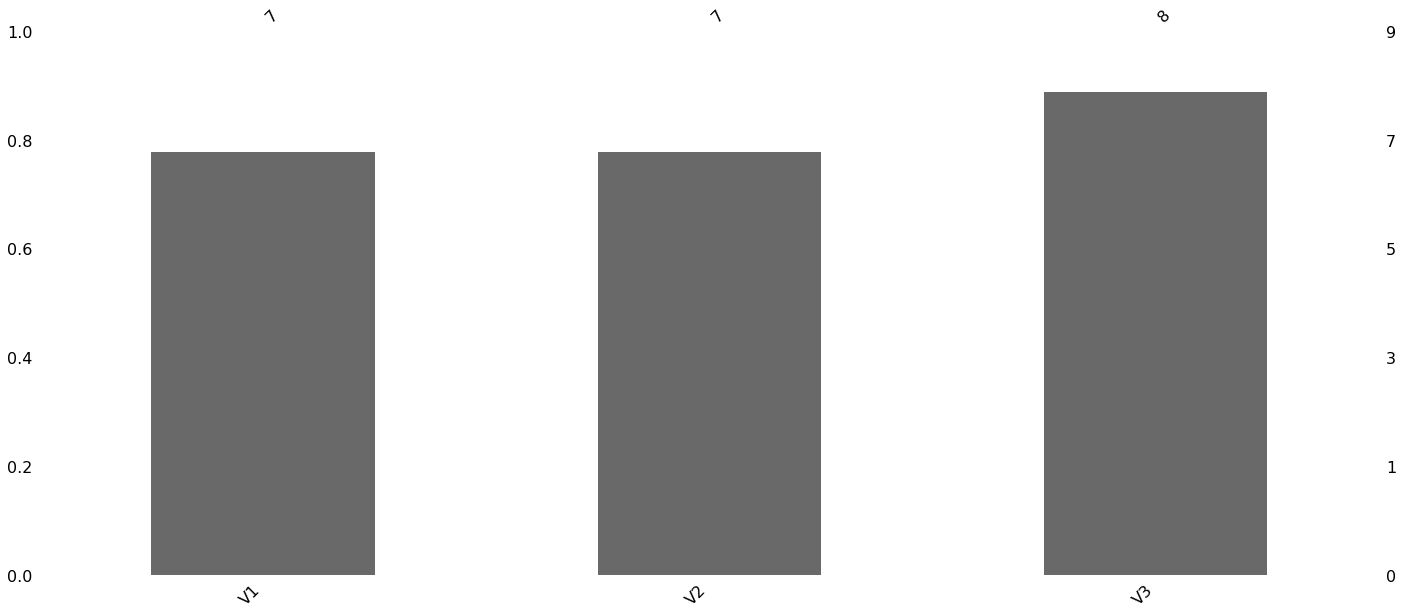

In [85]:
msno.bar(df)  #eksiklik değerleri ve soldaki doluluk yüzdesi verilmektedir. Sağda ise toplam gözlem sayısı
# sütunlar değişkenin doluluk miktarını gösterir.

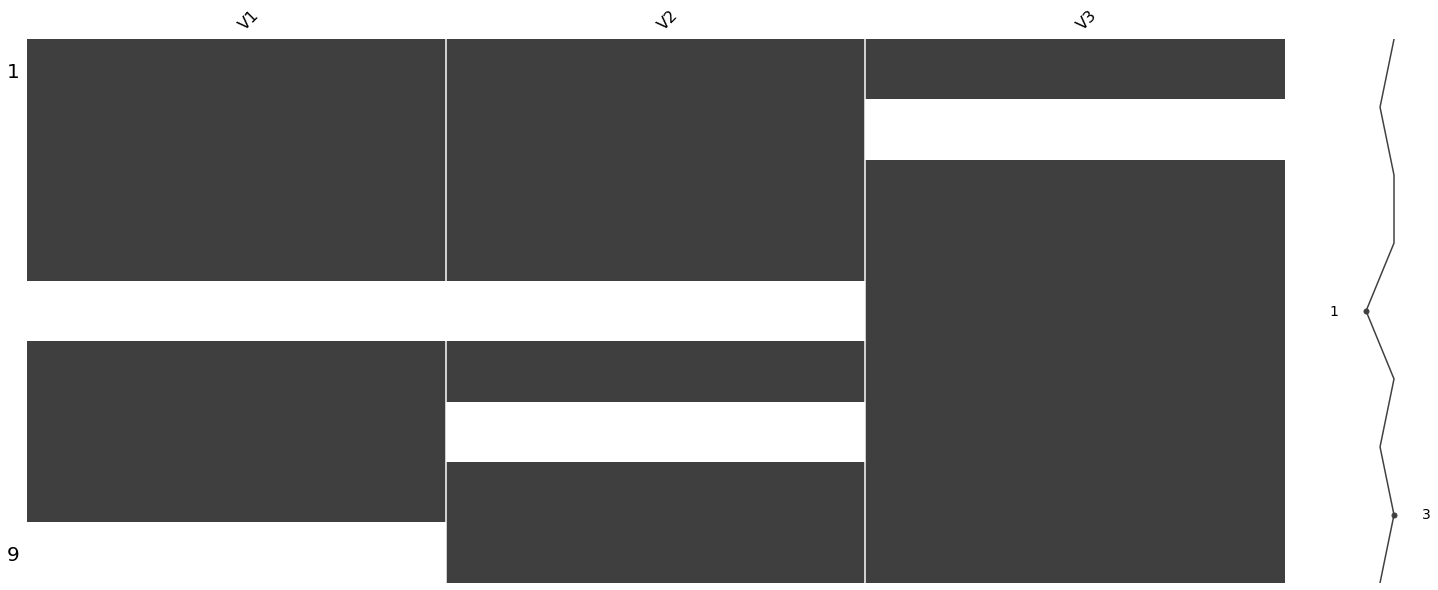

In [88]:
msno.matrix(df)

* **SAĞ TARAFTA DOLU OLAN SATIRLARIN SAYISI VERİLMEKTE EN AZ 1 , EN ÇOK 3 DOLULUK SAYISI**
* **EKSİK BİLGİLERİN DEĞİŞKENLER ARASINDA BAĞIMLILIK OLMA DURUMLARI HAKKINDA YORUM YAPILMASI İÇİN KULLANILABİLİR. BU SAYEDE VERİLERİN RASTLANTISAL OLARAK DOLDURULDUĞU YA DA KORELASYON(İLİŞKİLİ) LU OLARAK DOLDURULDUĞU HAKKINDA BİRAZ BİLGİ EDİNİLEBİLİR.**

In [98]:
df1 = sns.load_dataset("planets")

In [101]:
df1.head()  #planets'ler olarak adlandırılan datasetini kullanarak görselleştirmeye devam edelim.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


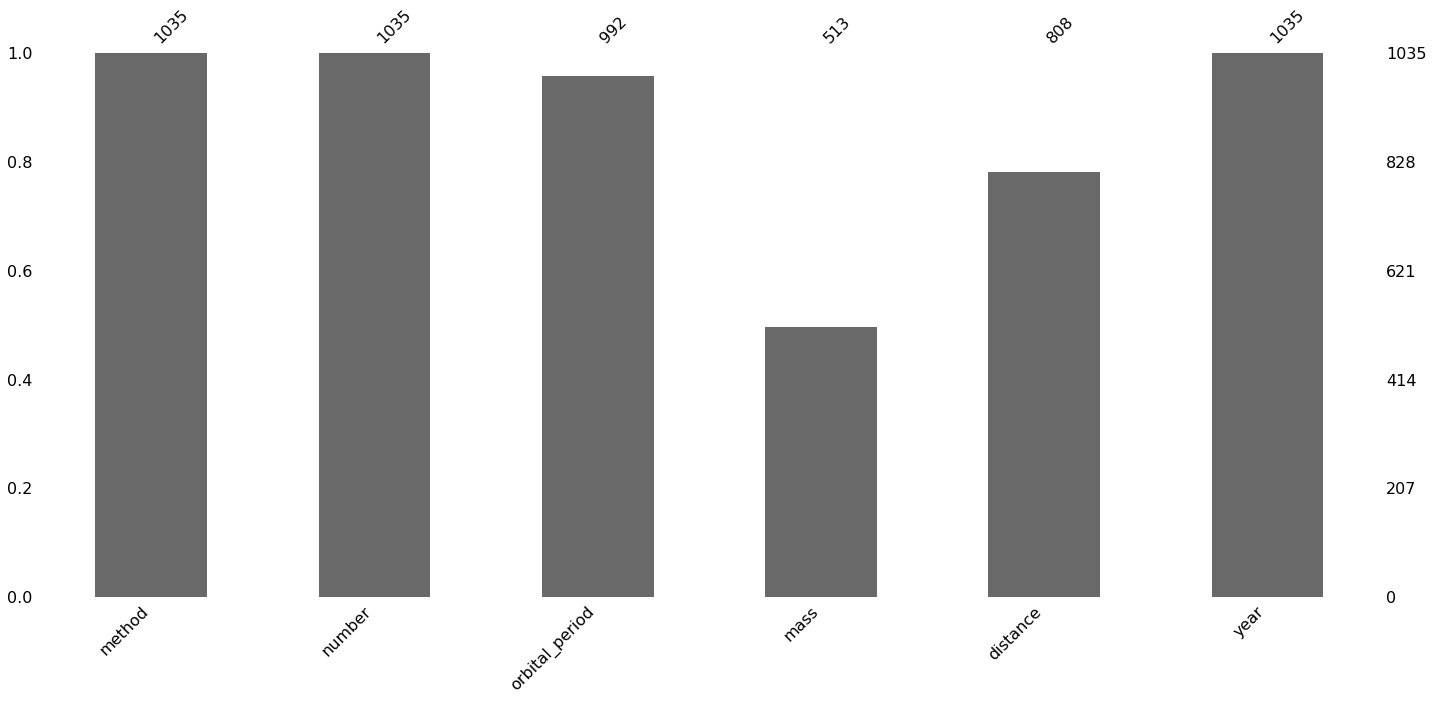

In [102]:
msno.bar(df1)

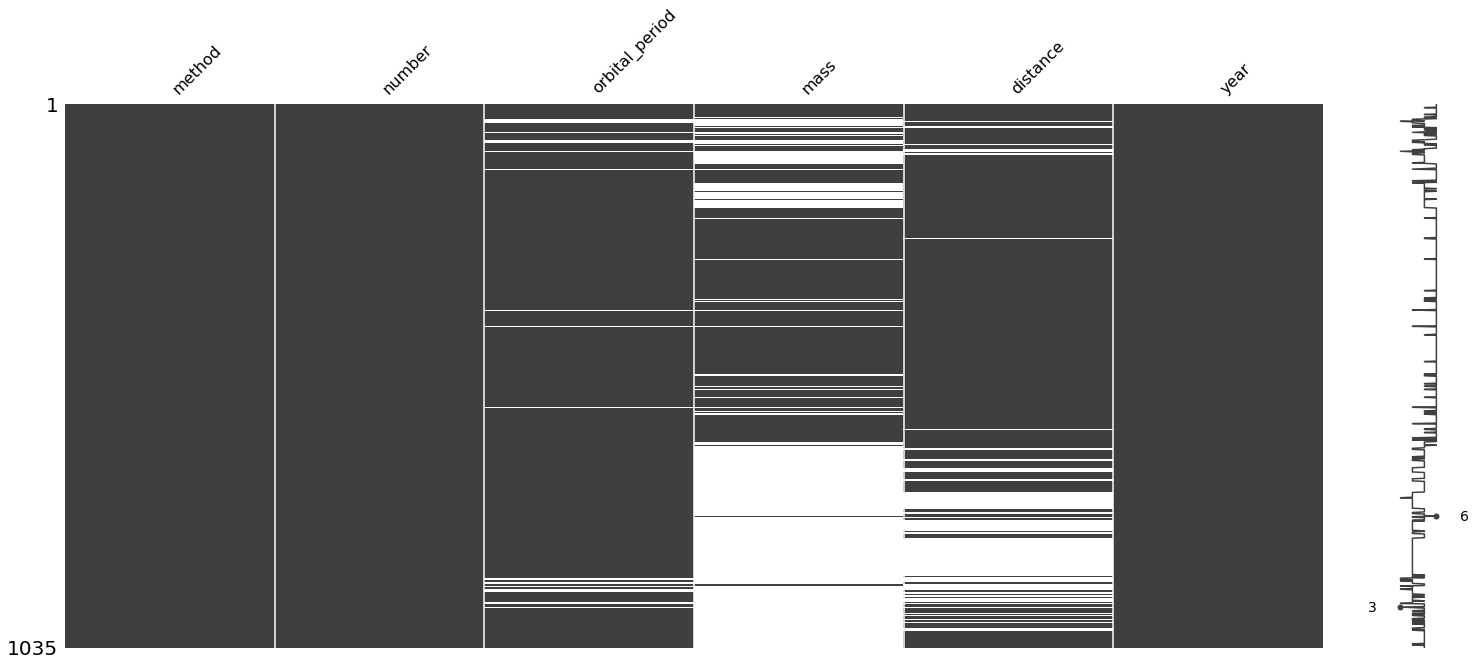

In [103]:
msno.matrix(df1)

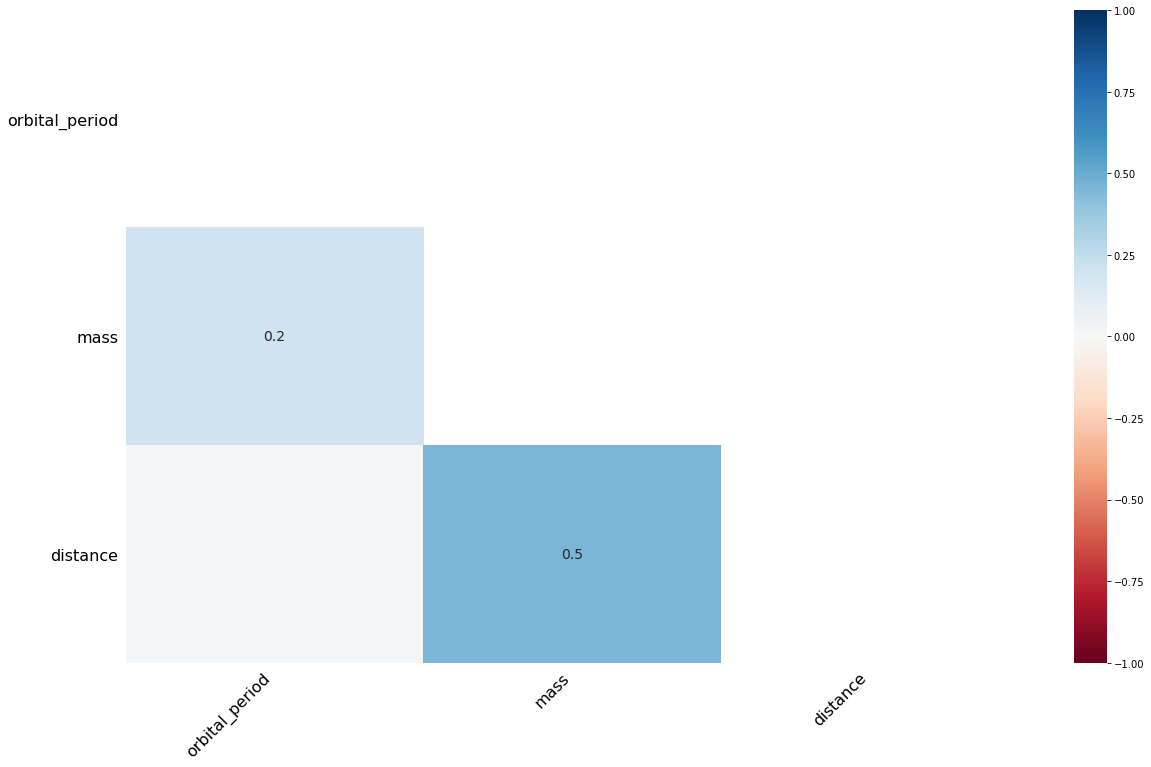

In [104]:
msno.heatmap(df1)

* **heatmap ISI HARİTASI BİZLERE "NULLITY CORRELATION(EKSİKLİK KORELASYONU-İLİŞKİSİ)" BİR KORELASYON BİLGİSİ VERİR. BU BİLGİ -1 İLE 1 ARASINDADIR (-1, 1)**
* **heatmap ISI HARİTASI KORELASYON VE RASTLANTISAL LIK HAKKINDA BİZLERE BİLGİ VERİR.  KUTU İÇERİSİNDE GÖRÜLEN DEĞER 1'E NE KADAR YAKIN İSE O DEĞİŞKENLER ARASINDA KORELASYONUN ARTMASI YANI İLİŞKİLİ OLDUĞU(BAĞIMSIZLIKTAN UZAKLAŞTIĞI YANİ BAĞIMLI OLDUĞU) YORUMU YAPILIR. BİR DEĞİŞKENDE EKSİKLİK GÖRÜYORSANIZ DİĞER DEĞİŞKENDEDE EKSİKLİK OLMA İHTİMALİ**
* "MASS" İLE "DİSTANCE" ARASINDAKİ KORELASYON ORANI 0.5 YANİ %50 OLARAK VERİLMİŞ. YANİ İKİ DEĞİŞKEN BİRBİRİNE %50 DEĞERDE BİRBİRİNE BAĞIMLIDIR.  

# KATEGORİK DEĞİŞKEN KIRILIMINDA DEĞER ATAMA 

### sayısal değerlerde eksiklik için : 

In [26]:
import pandas as pd
import numpy as np

V1 = np.array([5000, np.nan, 4555, 9000, 7410, np.nan, 4000 ])
V2 = np.array(["IT", "IK", "IK", "IK", "IT", "IT", "IK"])
V3 = np.array([0, 0, 1, 1, 1, 0, 1 ])

df = pd.DataFrame({"maas" : V1,
                  "departman" : V2,
                  "IS_cabin": V3})
df

,maas,departman,IS_cabin
0,5000.0,IT,0
1,NaN,IK,0
2,4555.0,IK,1
3,9000.0,IK,1
4,7410.0,IT,1
5,NaN,IT,0
6,4000.0,IK,1


**YAPILMASI İSTENEN MAAS VERİLERİNİN EKSİK BİLGİLERİNE MAAS DEĞİŞKENİNİN ORTALAMASI ATANMASI DEPARTMANLAR ARASINDA KARIŞIKLIĞA SEBEP VEREBİLİR YANİ YÜKSEK MAAS ALIRKEN DUSUK MAAS YAZILMASI YADA TERSİ. DEPARTMAN OLARAK GRUPLANDIRILDIKTAN SONRA DEPARTMANLARIN ORTALAMASI EKSİK DEĞERE ATANMASI SAĞLANABİLİR.**

In [33]:
df.groupby("departman")["maas"].mean()  #departmanlara gore sınıflandırıldıktan sonra departmanaları maas ortalamaları;

departman
IK    5851.666667
IT    6205.000000
Name: maas, dtype: float64

In [31]:
df

,maas,departman,IS_cabin
0,5000.0,IT,0
1,NaN,IK,0
2,4555.0,IK,1
3,9000.0,IK,1
4,7410.0,IT,1
5,NaN,IT,0
6,4000.0,IK,1


**datafram maas değişkeninin eksik bilgileri doldurulması şöyle olacak: dataframe "departman" olarak sınıflandırıldıktan sonra "maas" değişkeni ele alınarak mean fonksiyonu uygulanacak. transform dataframe lara fonksiyon uygulamak için kullanılır. tranform operation use for tranforming data.**

In [34]:
df["maas"].fillna( df.groupby("departman")["maas"].transform("mean"))

0    5000.000000
1    5851.666667
2    4555.000000
3    9000.000000
4    7410.000000
5    6205.000000
6    4000.000000
Name: maas, dtype: float64

### kategorik değişkenler için:

In [81]:
import pandas as pd
import numpy as np

V1 = np.array([5000, np.nan, 4555, 9000, 7410, np.nan, 4000 ])
V2 = np.array(["IT", np.nan , "IT", "IK", "IT", "IT", "IK"])
V3 = np.array([0, 0, 1, 1, 1, 0, 1 ])

df = pd.DataFrame({"maas" : V1,
                  "departman" : V2,
                  "IS_cabin": V3})
df

,maas,departman,IS_cabin
0,5000.0,IT,0
1,NaN,nan,0
2,4555.0,IT,1
3,9000.0,IK,1
4,7410.0,IT,1
5,NaN,IT,0
6,4000.0,IK,1


**DEPARTMAN DEĞİŞKENİ KATEGORİK BİR DEĞİŞKENDİR VE EKSİK BİLGİ İÇERMEKTEDİR. EKSİK BİLGİNİN DOLDURULMASI DEPARTMAN DEĞİŞKENİNİN MEDİAN' NI İLE DOLDURULABİLİR. YADA EKSİK BİLGİNİN BULUNGUĞU KONUMDAN SONRAKİ YADA ÖNCEKİ DEĞER ATANABİLİR.**

In [75]:
df["departman"].fillna(df["departman"].mode()[0])

0     IT
1    nan
2     IT
3     IK
4     IT
5     IT
6     IK
Name: departman, dtype: object

In [78]:
df["departman"].fillna(method = "ffill")  #eksik değerden sonra gelen ifade ile doldurulacak

0     IT
1    nan
2     IT
3     IK
4     IT
5     IT
6     IK
Name: departman, dtype: object

In [80]:
df["departman"].fillna(method = "bfill")  #eksik bilgiden once gelen ifade ile doldurulacaktır.

0     IT
1    nan
2     IT
3     IK
4     IT
5     IT
6     IK
Name: departman, dtype: object

# **TAHMİNE DAYALI EKSİK BİLGİ DOLDURMA: KNN & RANDOM FOREST & EM**

**TAHMİNE DAYALI EKSİK BİLGİ DOLDURMA MAKİNE ÖĞRENMESİ ALGORİTMALARI KULLANILARAK DOLDURULMASIDIR. EKSİK BİLGİ TAŞIYAN DEĞİŞKEN DİĞER DEĞİŞKENLERCE MODELLENİP EKSİK BİLGİLERİN DOLDURULMASI YÖNTEMİDİR. ŞUANDA YAPILACAK OLAN İŞLEMLER DETAY KAPSAMAMAKTADIR. BİR KAÇ FONKSİYON KULLANILARAK DOLDURULMASIDIR.**

In [20]:
import pandas as pd
import numpy as pd
import seaborn as sns
import missingno as msno

df = sns.load_dataset("titanic")
df = df.select_dtypes(["float64", "int64"])

In [7]:
df.isnull().sum()  # görüleceği üzere dataframe age değişkeninde 177 eksik bilgi bulunmakta.

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

## KNN MAKİNE ÖĞRENMESİ ALGORİTMASI : K EN YAKIN KOMŞULUK YÖNETEMİ İLE EKSİK BİLGİ DOLDURULMASI

In [8]:
# ycimpute makine ogrenmesi algoritmaların bulundugu kutuphane indirilmesi

In [ ]:
#https://pytorch.org/ sitesinden pytorch indirilebilir versiyon gucellenebilir.

In [1]:
!pip install ycimpute

## ycimpute yuklenemedi

In [3]:
from ycimpute.imputer import knnimput

OSError: [WinError 126] Belirtilen modül bulunamadı